In [42]:
import numpy as np
import pandas as pd

In [43]:
file = '/Users/joey/Documents/PycharmProjects/mywork/dimensionality_reduction_algorithm/iris.data'
df = pd.read_csv(file, )
df.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [44]:
df.columns = ['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
df.head()

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [45]:
# split data table into data X and class labels y
X = df.iloc[:, 0:4].values
y = df.iloc[:, 4].values

In [46]:


label_dict = {1: 'Iris-Setosa',
              2: 'Iris-Versicolor',
              3: 'Iris-Virgnica'}

feature_dict = {0: 'sepal length [cm]',
                1: 'sepal width [cm]',
                2: 'petal length [cm]',
                3: 'petal width [cm]'}

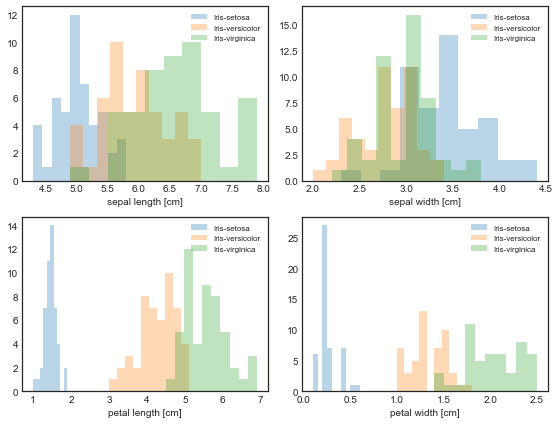

In [47]:
%matplotlib inline
from matplotlib import pyplot as plt
import math
plt.style.use('seaborn-white')
plt.figure(figsize=(8, 6))
for cnt in range(4):
    plt.subplot(2, 2, cnt+1)
    for lab in ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'):
        plt.hist(X[y==lab, cnt], label=lab, bins=10, alpha=0.3)
        plt.xlabel(feature_dict[cnt])
        plt.legend(loc='upper right', fancybox=True, fontsize=8)
plt.tight_layout()

In [48]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
print(X_std)

[[-1.1483555  -0.11805969 -1.35396443 -1.32506301]
 [-1.3905423   0.34485856 -1.41098555 -1.32506301]
 [-1.51163569  0.11339944 -1.29694332 -1.32506301]
 [-1.02726211  1.27069504 -1.35396443 -1.32506301]
 [-0.54288852  1.9650724  -1.18290109 -1.0614657 ]
 [-1.51163569  0.8077768  -1.35396443 -1.19326436]
 [-1.02726211  0.8077768  -1.29694332 -1.32506301]
 [-1.75382249 -0.34951881 -1.35396443 -1.32506301]
 [-1.1483555   0.11339944 -1.29694332 -1.45686167]
 [-0.54288852  1.50215416 -1.29694332 -1.32506301]
 [-1.2694489   0.8077768  -1.23992221 -1.32506301]
 [-1.2694489  -0.11805969 -1.35396443 -1.45686167]
 [-1.87491588 -0.11805969 -1.52502777 -1.45686167]
 [-0.05851493  2.19653152 -1.46800666 -1.32506301]
 [-0.17960833  3.122368   -1.29694332 -1.0614657 ]
 [-0.54288852  1.9650724  -1.41098555 -1.0614657 ]
 [-0.90616871  1.03923592 -1.35396443 -1.19326436]
 [-0.17960833  1.73361328 -1.18290109 -1.19326436]
 [-0.90616871  1.73361328 -1.29694332 -1.19326436]
 [-0.54288852  0.8077768  -1.18

In [49]:
mean_vec = np.mean(X_std, axis=0)
mean_vec

array([ 2.38437160e-16,  2.38437160e-17, -9.53748639e-17, -1.43062296e-16])

In [50]:
# cov_mat 协方差矩阵
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix :\n', cov_mat)

Covariance matrix :
 [[ 1.00675676 -0.10448539  0.87716999  0.82249094]
 [-0.10448539  1.00675676 -0.41802325 -0.35310295]
 [ 0.87716999 -0.41802325  1.00675676  0.96881642]
 [ 0.82249094 -0.35310295  0.96881642  1.00675676]]


In [51]:
# 两种协方差矩阵计算方法
# Estimate a covariance matrix
print('Numpy covariance matrix:\n',np.cov(X_std.T))

Numpy covariance matrix:
 [[ 1.00675676 -0.10448539  0.87716999  0.82249094]
 [-0.10448539  1.00675676 -0.41802325 -0.35310295]
 [ 0.87716999 -0.41802325  1.00675676  0.96881642]
 [ 0.82249094 -0.35310295  0.96881642  1.00675676]]


In [52]:
cov_mat = np.cov(X_std.T)
# Compute the eigenvalues and right eigenvectors of a square array.
# 计算特征值和特征向量
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors \n%s' % eig_vecs)
print('\nEigenvalues \n%s' % eig_vals)


Eigenvectors 
[[ 0.52308496 -0.36956962 -0.72154279  0.26301409]
 [-0.25956935 -0.92681168  0.2411952  -0.12437342]
 [ 0.58184289 -0.01912775  0.13962963 -0.80099722]
 [ 0.56609604 -0.06381646  0.63380158  0.52321917]]

Eigenvalues 
[2.92442837 0.93215233 0.14946373 0.02098259]


In [53]:
# Make a list of eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals)[i], eig_vecs[:,i]) for i in range(len(eig_vals))]
print(eig_pairs)
print('-'*10)

[(2.9244283691111126, array([ 0.52308496, -0.25956935,  0.58184289,  0.56609604])), (0.9321523302535072, array([-0.36956962, -0.92681168, -0.01912775, -0.06381646])), (0.14946373489813383, array([-0.72154279,  0.2411952 ,  0.13962963,  0.63380158])), (0.020982592764270565, array([ 0.26301409, -0.12437342, -0.80099722,  0.52321917]))]
----------


In [54]:
# Sort the (eigenvalue, eigencevtor) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
# 通过减少特征值直观地确认列表已正确排序
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])


Eigenvalues in descending order:
2.9244283691111126
0.9321523302535072
0.14946373489813383
0.020982592764270565


In [55]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
# 特征值分量占比
print(var_exp)

cum_var_exp = np.cumsum(var_exp)
cum_var_exp

[72.62003332692029, 23.147406858644153, 3.711515564584534, 0.5210442498510144]


array([ 72.62003333,  95.76744019,  99.47895575, 100.        ])

In [56]:
a = np.array([1, 2, 3, 4])
print(a)
print(np.cumsum(a))


[1 2 3 4]
[ 1  3  6 10]


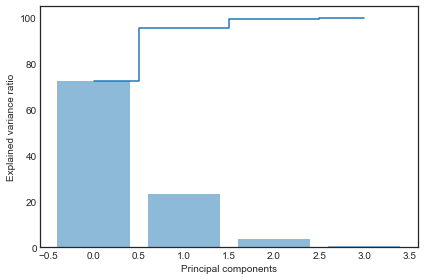

In [57]:
plt.style.use('seaborn-white')
plt.figure(figsize=(6, 4))
plt.bar(range(4), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(4), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.tight_layout()


In [58]:
# 选择两个较大的特征向量
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1),
                      eig_pairs[1][1].reshape(4,1)))
print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.52308496 -0.36956962]
 [-0.25956935 -0.92681168]
 [ 0.58184289 -0.01912775]
 [ 0.56609604 -0.06381646]]


In [59]:
Y = X_std.dot(matrix_w)
Y

array([[-2.10795032,  0.64427554],
       [-2.38797131,  0.30583307],
       [-2.32487909,  0.56292316],
       [-2.40508635, -0.687591  ],
       [-2.08320351, -1.53025171],
       [-2.4636848 , -0.08795413],
       [-2.25174963, -0.25964365],
       [-2.3645813 ,  1.08255676],
       [-2.20946338,  0.43707676],
       [-2.17862017, -1.08221046],
       [-2.34525657, -0.17122946],
       [-2.24590315,  0.6974389 ],
       [-2.66214582,  0.92447316],
       [-2.2050227 , -1.90150522],
       [-2.25993023, -2.73492274],
       [-2.21591283, -1.52588897],
       [-2.20705382, -0.52623535],
       [-1.9077081 , -1.4415791 ],
       [-2.35411558, -1.17088308],
       [-1.93202643, -0.44083479],
       [-2.21942518, -0.96477499],
       [-2.79116421, -0.50421849],
       [-1.83814105, -0.11729122],
       [-2.24572458, -0.17450151],
       [-1.97825353,  0.59734172],
       [-2.06935091, -0.27755619],
       [-2.18514506, -0.56366755],
       [-2.15824269, -0.34805785],
       [-2.28843932,

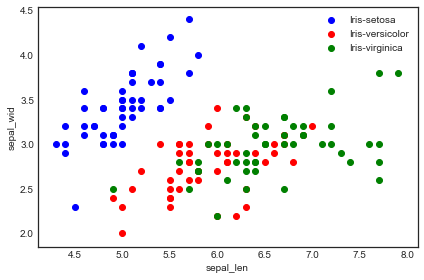

In [60]:
# 正常分类
plt.figure(figsize=(6, 4))
for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                        ('blue', 'red', 'green')):
     plt.scatter(X[y==lab, 0],
                X[y==lab, 1],
                label=lab,
                c=col)
plt.xlabel('sepal_len')
plt.ylabel('sepal_wid')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

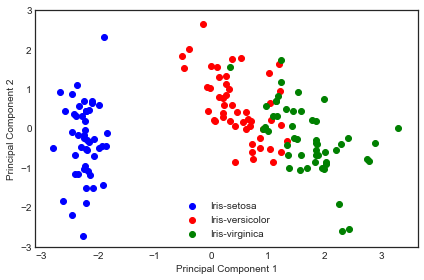

In [61]:
# 主成分分析
plt.figure(figsize=(6, 4))
for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                        ('blue', 'red', 'green')):
     plt.scatter(Y[y==lab, 0],
                Y[y==lab, 1],
                label=lab,
                c=col)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='lower center')
plt.tight_layout()
plt.show()

In [62]:
# 自带PCA
# sklearn.decomposition.PCA(n_components=None, copy=True, whiten=False)
from sklearn.decomposition import PCA
pac = PCA(n_components=2)
pca_result = pac.fit_transform(X)

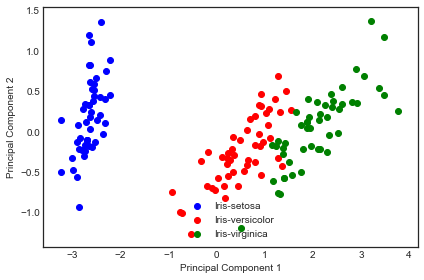

In [63]:
plt.figure(figsize=(6, 4))

for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                        ('blue', 'red', 'green')):
     plt.scatter(pca_result[y==lab, 0],
                pca_result[y==lab, 1],
                label=lab,
                c=col)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='lower center')
plt.tight_layout()
plt.show()

In [64]:

result

array([[-2.73363445, -0.16331092, -0.20387761],
       [-2.90803676, -0.13076902,  0.02432666],
       [-2.76491784, -0.30475856,  0.03735406],
       [-2.7461081 ,  0.34027983,  0.09572342],
       [-2.29679724,  0.75348469,  0.17374038],
       [-2.83904793, -0.0755604 ,  0.26385861],
       [-2.64423265,  0.17657389, -0.01624978],
       [-2.90682876, -0.56422248,  0.02708061],
       [-2.69199575, -0.10050325, -0.19190446],
       [-2.52354747,  0.65790634, -0.06985362],
       [-2.63112977,  0.02770681,  0.10724693],
       [-2.80576609, -0.2213837 , -0.200674  ],
       [-3.24397251, -0.4961847 ,  0.0681067 ],
       [-2.65975154,  1.19234788, -0.1452544 ],
       [-2.39988069,  1.3506441 ,  0.28295963],
       [-2.63931625,  0.82429682,  0.14467779],
       [-2.66585361,  0.32535115,  0.03290039],
       [-2.21575231,  0.88473854, -0.11513756],
       [-2.6045924 ,  0.52665249,  0.21902432],
       [-2.32791942,  0.4034959 , -0.2341806 ],
       [-2.56060135,  0.44614179,  0.214